In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/sample_data/Alphabets_data.csv')
print("Dataset loaded:", df.shape)
print("\nClass distribution:")
print(df['letter'].value_counts().head())
print("\nNo missing values:", df.isnull().sum().sum())

Dataset loaded: (20000, 17)

Class distribution:
letter
U    813
D    805
P    803
T    796
M    792
Name: count, dtype: int64

No missing values: 0


In [3]:
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

In [4]:
X = df.drop('letter', axis=1)
y = df['letter']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain: {X_train.shape}, Test: {X_test.shape}")


Train: (16000, 16), Test: (4000, 16)


In [7]:
mlp_base = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_tuned = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu',
                         alpha=0.001, learning_rate_init=0.01, max_iter=500, random_state=42)

In [8]:
mlp_base.fit(X_train, y_train)
mlp_tuned.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(128, 64),
              learning_rate_init=0.01, max_iter=500, random_state=42)

In [9]:
y_pred_base = mlp_base.predict(X_test)
y_pred_tuned = mlp_tuned.predict(X_test)

In [10]:
print("\nBase MLP Accuracy:", accuracy_score(y_test, y_pred_base))
print("Tuned MLP Accuracy:", accuracy_score(y_test, y_pred_tuned))


Base MLP Accuracy: 0.954
Tuned MLP Accuracy: 0.9535


In [11]:
print("\nTuned MLP Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


Tuned MLP Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       158
           B       0.93      0.87      0.90       153
           C       0.95      0.99      0.97       147
           D       0.96      0.94      0.95       161
           E       0.94      0.92      0.93       154
           F       0.97      0.94      0.95       155
           G       0.95      0.94      0.94       155
           H       0.94      0.90      0.92       147
           I       0.95      0.92      0.94       151
           J       0.94      0.95      0.94       149
           K       0.93      0.97      0.95       148
           L       1.00      0.97      0.99       152
           M       1.00      0.92      0.96       158
           N       0.84      0.99      0.91       157
           O       0.94      0.96      0.95       150
           P       0.97      0.96      0.97       161
           Q       0.93      0.98      0.96    

In [12]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Class Distribution')

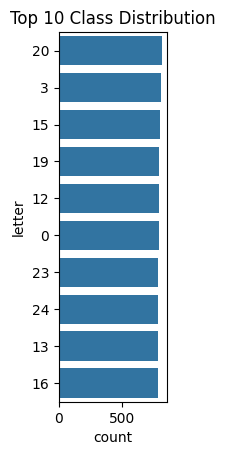

In [20]:
plt.subplot(1,4,1)
sns.countplot(y='letter', data=df, order=df['letter'].value_counts().index[:10])
plt.title('Top 10 Class Distribution')

Text(0.5, 1.0, 'PCA 2D View')

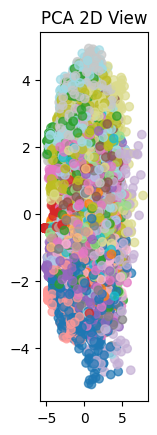

In [14]:
plt.subplot(1,4,2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab20', alpha=0.7)
plt.title('PCA 2D View')

Text(0.5, 1.0, 'Confusion Matrix')

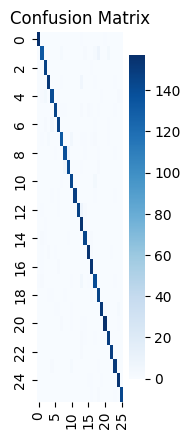

In [15]:
plt.subplot(1,4,3)
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')

(0.7, 1.0)

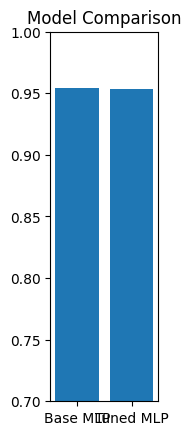

In [16]:
plt.subplot(1,4,4)
models = ['Base MLP', 'Tuned MLP']
accs = [accuracy_score(y_test, y_pred_base), accuracy_score(y_test, y_pred_tuned)]
plt.bar(models, accs)
plt.title('Model Comparison')
plt.ylim(0.7, 1.0)

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>